<a href="https://colab.research.google.com/github/neerajac19/Book-Recommendation-System/blob/main/Book_Recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Book Recommendation System**

### **Project Type** - Unsupervised
### **Contribution** - Individual

# **Project Summary -**

***A recommendation engine is a class of machine learning which offers***
***relevant suggestions to the customer. Before the recommendation system, the***
***major tendency to buy was to take a suggestion from friends. But Now Google***
***knows what news you will read, Youtube knows what type of videos you will watch***
***based on your search history, watch history, or purchase history.***
***A book recommendation system is a type of recommendation system where we have***
***to recommend similar books to the reader based on his interest. The books***
***recommendation system is used by online websites which provide e-books like***
***google play books, open library, good Reads etc.***
***In this project, we will use the Collaborative based filtering method to build*** ***a book recommender system.***

**Mainly three types of recommendation systems in machine learning based on** **filtering are used to suggest product and services to the consumers.**


**1. Content Filtering:**
**In this algorithm, we try finding items look alike. Once we have item look like matrix,we can easily recommend alike items to a customer, who has purchased any item from the store.**

**2. Collaborative Filtering:**
**Here, we try to search for look alike customers and offer products based on what his/her lookalike has chosen.This algorithm is very effective but takes a lot of time and resources.**

**3. Hybrid Filtering (Content Filtering + Collaborative Filtering):**
**Both Content Filtering & Collaborative Filtering is used for the purpose.** **you-tube uses this algorithm for their strong recommendation system.**

# **Problem Statement**




During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such
web services, recommender systems have taken more and more place in our lives. From
e-commerce (suggest to buyers articles that could interest them) to online advertisement
(suggest to users the right contents, matching their preferences), recommender systems are
today unavoidable in our daily online journeys.
In a very general way, recommender systems are algorithms aimed at suggesting relevant
items to users (items being movies to watch, text to read, products to buy, or anything else
depending on industries).
Recommender systems are really critical in some industries as they can generate a huge
amount of income when they are efficient or also be a way to stand out significantly from
competitors. The main objective is to create a book recommendation system for users.

Content

The Book-Crossing dataset comprises 3 files.

● Users
Contains the users. Note that user IDs (User-ID) have been anonymized and map to
integers. Demographic data is provided (Location, Age) if available. Otherwise, these
fields contain NULL values.

● Books

Books are identified by their respective ISBN. Invalid ISBNs have already been removed
from the dataset. Moreover, some content-based information is given (Book-Title,
Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web
Services. Note that in the case of several authors, only the first is provided. URLs linking
to cover images are also given, appearing in three different flavors (Image-URL-S,
Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the
Amazon website.

● Ratings

Contains the book rating information. Ratings (Book-Rating) are either explicit,
expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit,
expressed by 0.

*In this project, we will use the Collaborative based filtering method to build a book recommender system.*


# **GitHub Link -**

### **https://github.com/neerajac19/Book-Recommendation-System**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
#Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing the books dataset
d1 = pd.read_csv('/content/drive/MyDrive/Book Recommendation System-Neeraja C/Copy of Books.csv')

In [ ]:
books = d1.copy()

In [ ]:
#importing users dataset
d2 = pd.read_csv('/content/drive/MyDrive/Book Recommendation System-Neeraja C/Copy of Users.csv')

In [ ]:
users = d2.copy()

In [ ]:
#importing third dataset
d3 = pd.read_csv('/content/drive/MyDrive/Book Recommendation System-Neeraja C/Copy of Ratings.csv')

In [ ]:
ratings = d3.copy()

### Dataset First View

In [ ]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


##  **Feature Engineering & Data Pre-processing**

 **Data Cleaning of first dataset**

We have some extra columns which are not required for our task like image URLs.So we will remove that columns.

In [ ]:
## Drop URL columns
books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1, inplace=True)
books.head()


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [ ]:
books.tail(20)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
271340,3596156904,Amok.,Emmanuel Carrere,2003,"Fischer (Tb.), Frankfurt"
271341,1874166633,Introducing Nietzsche (Foundations in Children...,Laurence Gane,1998,Natl Book Network
271342,0130897930,Core Web Programming (2nd Edition),Marty Hall,2001,Prentice Hall PTR
271343,020130998X,The Unified Modeling Language Reference Manual...,James Rumbaugh,1998,Addison-Wesley Professional
271344,2268032019,Petite histoire de la dÃ?Â©sinformation,Vladimir Volkoff,1999,Editions du Rocher
271345,0684860112,Driving to Detroit: Memoirs of a Fast Woman,Lesley Hazleton,1999,Simon &amp; Schuster (Trade Division)
271346,0395264707,Dreamsnake,Vonda N. McIntyre,1978,Houghton Mifflin
271347,3442150663,Der Mossad.,Victor Ostrovsky,2000,Goldmann
271348,0231128444,Slow Food(The Case For Taste),Carlo Petrini,2003,Columbia University Press
271349,0520242335,Strong Democracy : Participatory Politics for ...,Benjamin R. Barber,2004,University of California Press


In [ ]:
## Checking for null values
books.isnull().sum() 


ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
dtype: int64

In [ ]:
books.loc[books['Book-Author'].isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing


In [ ]:
books.loc[books['Publisher'].isnull(),:]


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [ ]:
books.at[187689 ,'Book-Author'] = 'Other'

books.at[128890 ,'Publisher'] = 'Other'
books.at[129037 ,'Publisher'] = 'Other'


In [ ]:
## Checking for column Year-of-publication
books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [ ]:
books.loc[books['Year-Of-Publication'] == 'DK Publishing Inc',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


In [ ]:
books.loc[books['Year-Of-Publication'] == 'Gallimard',:]


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...


In [ ]:
books.at[209538 ,'Publisher'] = 'DK Publishing Inc'
books.at[209538 ,'Year-Of-Publication'] = 2000
books.at[209538 ,'Book-Title'] = 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)'
books.at[209538 ,'Book-Author'] = 'Michael Teitelbaum'

books.at[221678 ,'Publisher'] = 'DK Publishing Inc'
books.at[221678 ,'Year-Of-Publication'] = 2000
books.at[209538 ,'Book-Title'] = 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)'
books.at[209538 ,'Book-Author'] = 'James Buckley'

books.at[220731 ,'Publisher'] = 'Gallimard'
books.at[220731 ,'Year-Of-Publication'] = '2003'
books.at[209538 ,'Book-Title'] = 'Peuple du ciel - Suivi de Les bergers '
books.at[209538 ,'Book-Author'] = 'Jean-Marie Gustave Le ClÃ?Â©zio'


In [ ]:
## Converting year of publication in Numbers
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype(int)


In [ ]:
print(sorted(list(books['Year-Of-Publication'].unique())))


[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


In [ ]:
from collections import Counter

In [ ]:
## Replacing Invalid years with max year
count = Counter(books['Year-Of-Publication'])
[k for k, v in count.items() if v == max(count.values())]



[2002]

In [ ]:
books.loc[books['Year-Of-Publication'] > 2021, 'Year-Of-Publication'] = 2002
books.loc[books['Year-Of-Publication'] == 0, 'Year-Of-Publication'] = 2002

In [ ]:
## Drop duplicate rows
books.drop_duplicates(keep='last', inplace=True) 
books.reset_index(drop = True, inplace = True)


In [ ]:
dataset1=books.copy()

 **Data Cleaning for second dataset**

In [ ]:
## Checking null values
print(users.isna().sum())     

User-ID          0
Location         0
Age         110762
dtype: int64


In [ ]:
## Check for all values present in Age column
print(sorted(list(users['Age'].unique())))


[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

<Figure size 1440x1440 with 0 Axes>

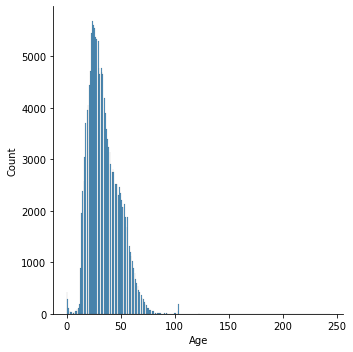

In [ ]:
plt.figure(figsize=(20, 20))
sns.displot(users.Age)

***From the given distplot we can see that we have outliers in the Age***

In [ ]:
#taking required ages
required = users[users['Age'] <= 80]
required = required[required['Age'] >= 10]


In [ ]:
#calculating mean
mean = round(required['Age'].mean())   
mean

35

In [ ]:
users.loc[users['Age'] > 80, 'Age'] = mean    #outliers with age grater than 80 are substituted with mean 
users.loc[users['Age'] < 10, 'Age'] = mean    #outliers with age less than 10 years are substitued with mean
users['Age'] = users['Age'].fillna(mean)      #filling null values with mean
users['Age'] = users['Age'].astype(int)       #changing Datatype to int

In [ ]:
## Drop duplicate rows
users.drop_duplicates(keep='last', inplace=True)
users.reset_index(drop=True, inplace=True)


 **Data Cleaning for third dataset**

In [ ]:
## Checking for null values
ratings.isnull().sum() 



User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [ ]:
## Drop duplicate rows
ratings.drop_duplicates(keep='last', inplace=True)
ratings.reset_index(drop=True, inplace=True)


In [ ]:
dataset2=ratings.copy()

## **Data Wrangling**

**Average Rating**

In [ ]:
#merging book_df and ratings_df
book_rating_df = pd.merge(books, ratings, on='ISBN',how='inner')
book_rating_df=book_rating_df.drop(['Year-Of-Publication','Book-Author'],axis=1)

In [ ]:
Rating_count = book_rating_df.groupby('Book-Title').count()
Rating_count.rename(columns={'Book-Rating':'Rating Count'},inplace=True)

In [ ]:
#calculating average rating for each book
Avg_Rating_count = book_rating_df.groupby('Book-Title', as_index=False)['Book-Rating'].mean()
Avg_Rating_count.rename(columns={'Book-Rating':'Avg Rating'},inplace=True)
Avg_Rating_count.head(10)

,Book-Title,Avg Rating
0,A Light in the Storm: The Civil War Diary of ...,2.25
1,Always Have Popsicles,0.00
2,Apple Magic (The Collector's series),0.00
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.00
4,Beyond IBM: Leadership Marketing and Finance ...,0.00
5,Clifford Visita El Hospital (Clifford El Gran...,0.00
6,Dark Justice,10.00
7,Deceived,0.00
8,Earth Prayers From around the World: 365 Pray...,5.00
9,Final Fantasy Anthology: Official Strategy Gu...,5.00


In [ ]:
most_rated_books_df = Rating_count.merge(Avg_Rating_count,on='Book-Title')

In [ ]:
most_rated_books_df = most_rated_books_df.sort_values('Rating Count',ascending=False).head(50)
most_rated_books_df=most_rated_books_df.drop(['User-ID','ISBN'],axis=1)
most_rated_books_df

,Book-Title,Publisher,Rating Count,Avg Rating
234951,Wild Animus,2502,2502,1.019584
196326,The Lovely Bones: A Novel,1295,1295,4.468726
183573,The Da Vinci Code,898,898,4.642539
5303,A Painted House,838,838,3.231504
199237,The Nanny Diaries: A Novel,828,828,3.530193
27922,Bridget Jones's Diary,815,815,3.527607
206502,The Secret Life of Bees,774,774,4.447028
52982,Divine Secrets of the Ya-Ya Sisterhood: A Novel,740,740,3.437838
204387,The Red Tent (Bestselling Backlist),723,723,4.334716
14392,Angels &amp; Demons,670,670,3.708955


Text(0.5, 0, 'Average rating')

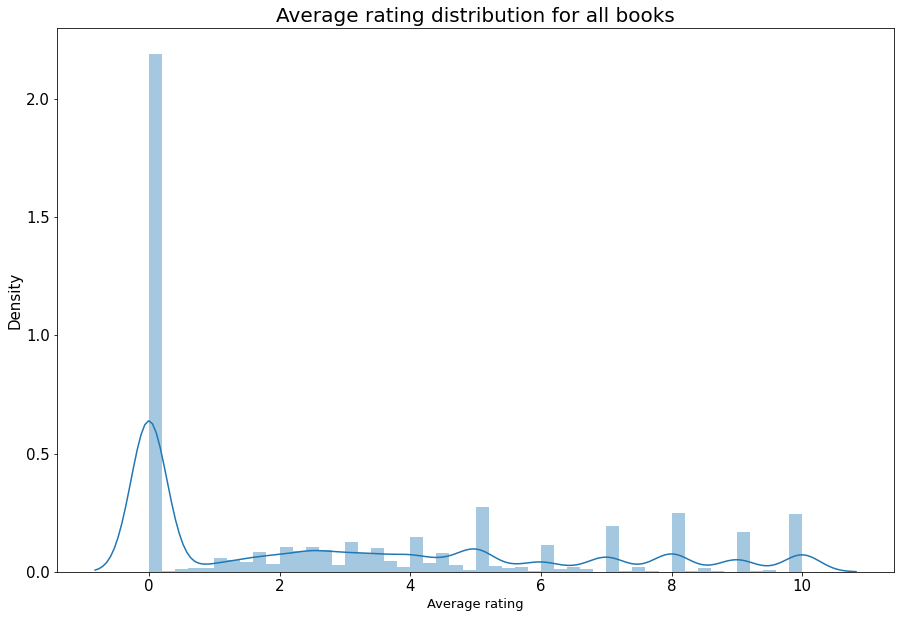

In [ ]:
Avg_Rating_count['Avg Rating'] = Avg_Rating_count['Avg Rating'].astype(float)
fig, ax = plt.subplots(figsize=[15,10])
sns.distplot(Avg_Rating_count["Avg Rating"],ax=ax)
ax.set_title('Average rating distribution for all books',fontsize=20)
ax.set_xlabel('Average rating',fontsize=13)

In [ ]:
# Explicit Ratings Dataset
Explicit_rating_dataset = book_rating_df[book_rating_df['Book-Rating'] != 0]
Explicit_rating_dataset = Explicit_rating_dataset.reset_index(drop = True)
Explicit_rating_dataset.shape

(383842, 5)

In [ ]:
Explicit_rating_dataset.head()

,ISBN,Book-Title,Publisher,User-ID,Book-Rating
0,0002005018,Clara Callan,HarperFlamingo Canada,8,5
1,0002005018,Clara Callan,HarperFlamingo Canada,11676,8
2,0002005018,Clara Callan,HarperFlamingo Canada,67544,8
3,0002005018,Clara Callan,HarperFlamingo Canada,116866,9
4,0002005018,Clara Callan,HarperFlamingo Canada,123629,9


In [ ]:
## Implicit Ratings Dataset
Implicit_dataset = book_rating_df[book_rating_df['Book-Rating'] == 0]
Implicit_dataset = Implicit_dataset.reset_index(drop = True)
Implicit_dataset.shape

(647294, 5)

Text(0.5, 1.0, 'Explicit Ratings')

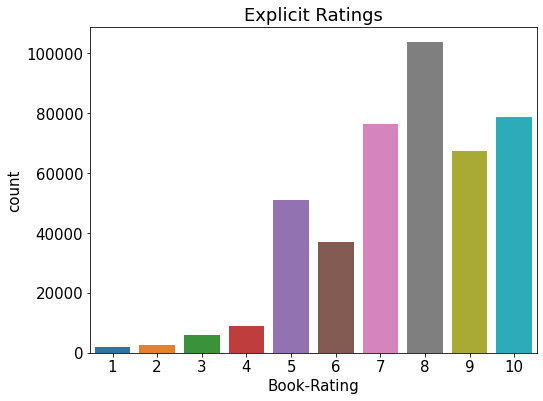

In [ ]:
# Explicit Ratings
plt.figure(figsize=(8,6))
data = ratings[ratings['Book-Rating'] != 0]
sns.countplot(x="Book-Rating", data=data)
plt.title("Explicit Ratings")

##  **Data Vizualization, Storytelling & Experimenting with charts :    Understand the relationships between variables**

### **Top 10 authors with most books**

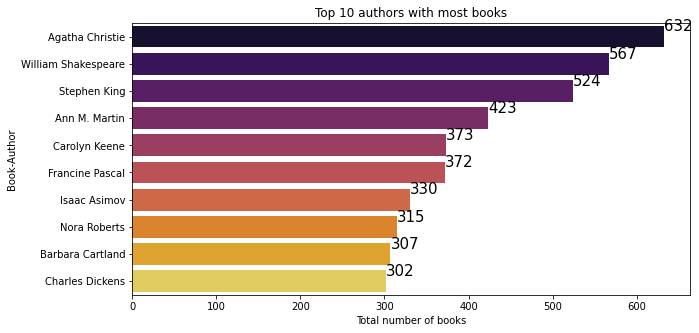

In [ ]:
most_books = books.groupby('Book-Author')['Book-Title'].count().reset_index().sort_values('Book-Title', ascending=False).head(10).set_index('Book-Author')
plt.figure(figsize=(10,5))
ax = sns.barplot(most_books['Book-Title'], most_books.index, palette='inferno')
ax.set_title("Top 10 authors with most books")
ax.set_xlabel("Total number of books")
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.2, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='black')
plt.show()

***These are the top 10 authors with most number of books. Agatha Christie is the most popular author followed by William Shakespeare and Stephen King.***

### **Rating Distribution**

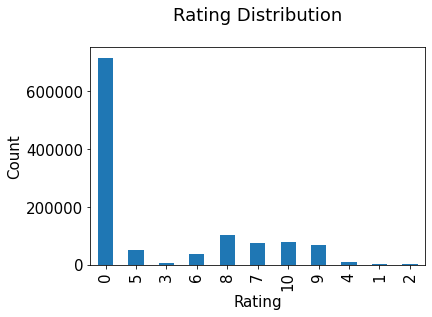

In [ ]:
plt.rc("font", size=15)
ratings['Book-Rating'].value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

***Zero rating is more in dataset. So we can say that most of the people leaving without give rating to the books.***

### **Average Ratings of Most Read Books**

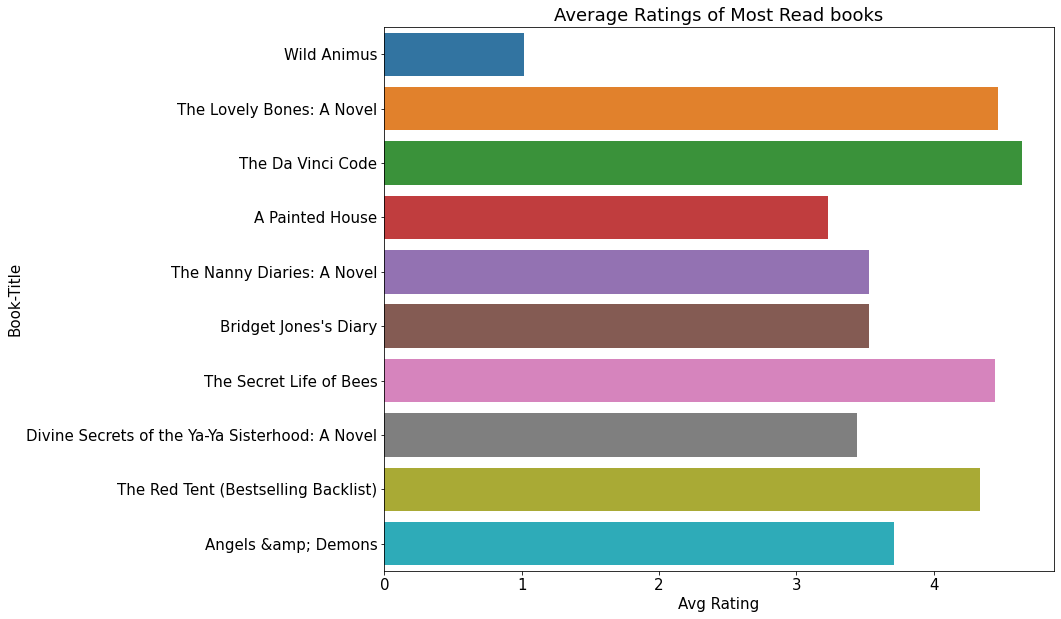

In [ ]:
plt.figure(figsize=(12,10))
plt.title("Average Ratings of Most Read books")
sns.barplot(x = 'Avg Rating', y = 'Book-Title', data = most_rated_books_df.head(10))

***Wild Animus is the most rated book but its average rating is less.***

### **Most Reviewed Books**

In [ ]:
most_reviewed_books = Explicit_rating_dataset['Book-Title'].value_counts().reset_index()
most_reviewed_books.columns = ['bookTitle','count']

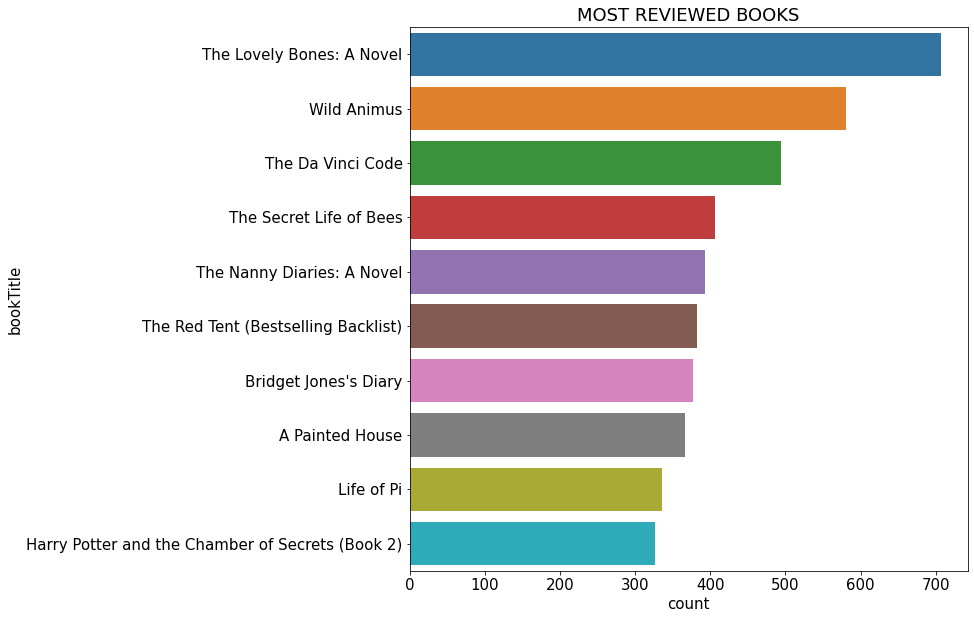

In [ ]:
plt.figure(figsize = (10,10))
plt.title("MOST REVIEWED BOOKS")
sns.barplot(x = 'count', y = 'bookTitle', data = most_reviewed_books.head(10))

In EDA I had taken a user who has rated at least 200 books and I also limit
books and I had taken only those books which have received at least 50 ratings
from a user.

# **Recommendation Systems**

In [ ]:
bookName = input("Enter a book name: ")
number = int(input("Enter number of books to recommend: "))

Enter a book name: The Street Lawyer
Enter number of books to recommend: 5


### **Popularity Based Recommendation System**

It is a type of recommendation system which works on the
principle of popularity or anything which is on trend. 
These systems check about the items which are in trend or are 
most popular among the users and directly recommend those.



In [ ]:
def popularity_based(dataframe, n):
    if n >= 1 and n <= len(dataframe):
        data = pd.DataFrame(dataframe.groupby('ISBN')['Book-Rating'].count()).sort_values('Book-Rating', ascending=False).head(n)
        result = pd.merge(data, books, on='ISBN', left_index = False)
        return result
    return "Invalid number of books entered!!"

In [ ]:
print("Top", number, "Popular books are: ")
popularity_based(Explicit_rating_dataset, number)

Top 5 Popular books are: 


,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0316666343,707,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown"
1,0971880107,581,Wild Animus,Rich Shapero,2004,Too Far
2,0385504209,487,The Da Vinci Code,Dan Brown,2003,Doubleday
3,0312195516,383,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA
4,0060928336,320,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial


***These are the top 5 popular books.***

***Demerits of Popularity Based Recommendation System:***


*   Not personalized
*   The system would recommend the same sort of books which are solely based upon popularity to every other user.





## **Collaborative Filtering**

We do not want to find a similarity between
users or books. we want to do that if there 
is user A who has read and liked x and y books,
And user B has also liked this two books and
now user A has read and liked some z book 
which is not read by B so we have to recommend
z book to user B. This is what collaborative filtering is.



**In Collaborative Filtering I have used Model Based Approach and Memory**
**Based Approach. In memory-based approach I recommended books using**
**cosine similarity and in model-based approach I used SVD.**

In [ ]:
x = book_rating_df.groupby('User-ID').count()['Book-Rating'] > 200
index_users = x[x].index

In [ ]:
filtered_rating = book_rating_df[book_rating_df['User-ID'].isin(index_users)]

Here I am using ISBN instead of Book-Title for easy retrieval of data.

In [ ]:
y = filtered_rating.groupby('ISBN').count()['Book-Rating']>=50
famous_books = y[y].index

In [ ]:
final_ratings = filtered_rating[filtered_rating['ISBN'].isin(famous_books)]

We convert the rating column to a 2D matrix. The matrix will be sparse because not every user rated every book.

In [ ]:
pt = final_ratings.pivot_table(index='ISBN',columns='User-ID',values='Book-Rating')

In [ ]:
pt.fillna(0,inplace=True)

In [ ]:
pt=pt.transpose()

In [ ]:
pt

ISBN,002542730X,006016848X,0060391626,0060392452,0060502258,0060915544,0060921145,0060928336,0060930535,0060934417,...,140003065X,1400031354,1400031362,1400034779,155874262X,1558743669,1558744150,1559029838,1573225789,1573229326
User-ID,,,,,,,,,,,,,,,,,,,,,
254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2977,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3363,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
275970,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
277427,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
final_df = pt.values
final_df[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 9., 0.]])

In [ ]:
final_df.shape

(809, 502)

### **Singular-Value-Decomposition**


Singular-Value Decomposition or SVD is a common and widely used matrix decomposition method. All matrices are able to be factored using an SVD, which makes it more stable than other methods, such as the eigendecomposition. As such, it is often used in a wide array of applications including compression and data reduction.

**SVD in Python**

SciPy has a straightforward implementation of SVD to help us avoid all the complex steps of SVD. We can use the svds() function to decompose a matrix as shown below.

In [ ]:
from scipy.sparse.linalg import svds

In [ ]:
# The number of factors to factor the user-item matrix.
NUMBER_OF_FACTORS_MF = 15

#Performs matrix factorization of the original user item matrix
U, sigma, Vt = svds(final_df, k = NUMBER_OF_FACTORS_MF)
     

In [ ]:
sigma = np.diag(sigma)
sigma.shape

(15, 15)

Now we can recreate the original ratings matrix by multiplying the three factors of the matrix together.

In [ ]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 
all_user_predicted_ratings

array([[ 0.16322817,  0.04720679,  0.15084097, ..., -0.1433906 ,
        -0.14566235,  0.19978999],
       [ 0.07155334,  0.08849103,  0.16197237, ...,  0.07617869,
        -0.01268502,  0.1738723 ],
       [ 0.42737757,  0.1346618 ,  0.10146987, ...,  0.28901195,
         1.33261961,  0.10164868],
       ...,
       [ 0.18829865,  0.10551016,  0.34988238, ...,  0.23020317,
         0.16915568,  0.34375439],
       [-0.10115675, -0.05401899, -0.15927309, ...,  0.01217107,
        -0.19196489, -0.05195116],
       [-0.01515722,  0.01988473, -0.00473305, ...,  0.12299013,
         0.00908046, -0.03731702]])

In [ ]:
columns=pt.columns

In [ ]:
#Converting the reconstructed matrix back to a Pandas dataframe
cf_preds_df = pd.DataFrame(all_user_predicted_ratings, columns = columns)
cf_preds_df.head()

ISBN,002542730X,006016848X,0060391626,0060392452,0060502258,0060915544,0060921145,0060928336,0060930535,0060934417,...,140003065X,1400031354,1400031362,1400034779,155874262X,1558743669,1558744150,1559029838,1573225789,1573229326
0,0.163228,0.047207,0.150841,0.425119,0.728278,-0.262323,-0.103526,0.634299,0.036034,-0.482869,...,0.088798,-0.182206,0.373426,0.215539,0.258675,0.222065,0.135442,-0.143391,-0.145662,0.199790
1,0.071553,0.088491,0.161972,0.202984,-0.019053,0.023520,0.081189,0.640952,0.188178,0.048497,...,-0.030522,0.287339,0.128521,0.369504,0.378361,-0.051848,0.067208,0.076179,-0.012685,0.173872
2,0.427378,0.134662,0.101470,0.335579,0.191425,1.011425,0.149496,-0.442969,0.509652,1.061947,...,-0.048924,0.509192,0.146383,-0.237646,0.189094,0.297777,0.363889,0.289012,1.332620,0.101649
3,0.046811,0.005135,0.062797,0.186226,0.213427,0.100454,0.053086,0.278883,0.323879,0.093646,...,0.025667,0.030414,0.039862,0.036608,0.018746,0.300125,0.260013,-0.056810,-0.015928,0.188591
4,0.109467,0.066629,0.130080,-0.036761,-0.269038,0.354557,0.080079,-0.327707,0.287907,0.260815,...,-0.022192,0.036632,-0.136657,-0.239072,0.041580,0.230455,0.266019,0.118210,0.392987,0.079726


In [ ]:
def recommend_books(preds_df, userID, books_df, ratings_df, num_recommendations=5):
    
    # Get and sort the user's predictions
    user_row_number = userID - 1 # UserID starts at 1, not 0
    sorted_user_predictions = preds_df.iloc[user_row_number].sort_values(ascending=False) # UserID starts at 1
#     print(preds_df.iloc[user_row_number])
#     print(sorted_user_predictions)
    # Get the user's data and merge in the book information.
    user_data = ratings_df[ratings_df['User-ID'] == (userID)]
    user_full = (user_data.merge(books_df, how = 'left', left_on = 'ISBN', right_on = 'ISBN').
                     sort_values(['Book-Rating'], ascending=False)
                 )
#     print(user_full)
#     print 'User {0} has already rated {1} books.'.format(userID, user_full.shape[0])
#     print 'Recommending highest {0} predicted ratings books not already rated.'.format(num_recommendations)
    #                left_on = 'movieId',
#                right_on = 'movieId').
# merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left').rename(columns = {user_row_number: 'Predictions'}).
    # Recommend the highest predicted rating books that the user hasn't seen yet.
    recommendations = (books_df[~books_df['ISBN'].isin(user_full['ISBN'])]).merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left', left_on = 'ISBN',
               right_on = 'ISBN').rename(columns = {user_row_number: 'Predictions'}).sort_values('Predictions', ascending = False).iloc[:num_recommendations, :-1]
                      

    return user_full, recommendations

In [ ]:
already_rated, predictions = recommend_books(cf_preds_df,500,dataset1,dataset2, 10)

In [ ]:
already_rated.head(10)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,500,0849943450,10,The Canopy,Angela Elwell Hunt,2003,WestBow Press
1,500,084994371X,8,Blink,Ted Dekker,2003,WestBow Press
2,500,0849943728,0,Three,Ted Dekker,2003,WestBow Press


In [ ]:
predictions

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
745,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday
118,0671027360,Angels &amp; Demons,Dan Brown,2001,Pocket Star
37,0446310786,To Kill a Mockingbird,Harper Lee,1988,Little Brown &amp; Company
231,0452282152,Girl with a Pearl Earring,Tracy Chevalier,2001,Plume Books
1919,067976402X,Snow Falling on Cedars,David Guterson,1995,Vintage Books USA
522,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA
8943,0440212561,Outlander,DIANA GABALDON,1992,Dell
356,0142001740,The Secret Life of Bees,Sue Monk Kidd,2003,Penguin Books
408,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown"
5067,014028009X,Bridget Jones's Diary,Helen Fielding,1999,Penguin Books


***These are the 10 recommended books corresponding to the User-ID:500.***

***SVD is not a perfect solution, but when we have enough users and items, we are able to gain valuable insights about the underlying relationships found in our data.***

### **Cosine Similarity**


The recommendation system in its core algorithm uses a fundamental mathematical metric called “similarity”, which compares and quantifies the similarity between two items: user selected vs rest of items in the catalog. The list of items with high similarity values to the ones that the user selected are recommended.

There are many similarity metrics used in recommendation systems.The most commonly used similarity metric is Cosine similarity.


In cosine similarity, data objects in a dataset are treated as a vector. The formula to find the cosine similarity between two vectors is – x . y = product (dot) of the vectors ‘x’ and ‘y’. ||x|| and ||y|| = length of the two vectors ‘x’ and ‘y’. ||x|| * ||y|| = cross product of the two vectors ‘x’ and ‘y’.

In [ ]:
Y = filtered_rating.groupby('Book-Title').count()['Book-Rating']>=50
Famous_Books = Y[Y].index

In [ ]:
final_dataset=filtered_rating[filtered_rating['Book-Title'].isin(Famous_Books)]

In [ ]:
pivot = final_dataset.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')

In [ ]:
pivot.fillna(0,inplace=True)

In [ ]:
pivot.shape

(706, 810)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
similarity_scores = cosine_similarity(pivot)

In [ ]:
def recommend(book_name):
    # index fetch
    index = np.where(pivot.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:5]
    
    data = []
    for i in similar_items:
        item = []
        temp_df = dataset1[dataset1['Book-Title'] == pivot.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        
        data.append(item)
    
    return data

In [ ]:
recommend('Wild Animus')

[['Pay It Forward', 'Catherine Ryan Hyde'],
 ['At Home in Mitford (The Mitford Years)', 'Jan Karon'],
 ['The First Counsel', 'Brad Meltzer'],
 ['The Andromeda Strain', 'MICHAEL CRICHTON']]

***Hence, we have successfully built a book recommendation system.***

# **Conclusion**

**A recommendation system helps an organization to create loyal customers and build trust by them desired products and services for which they came on your site. The recommendation system today are so powerful that they can handle the new customer too who has visited the site for the first time. They recommend the products which are currently trending or highly rated and they can also recommend the products which bring maximum profit to the company.**

**By this project I am**
**able to compare and contrast the advantages/ disadvantages of memory vs.**
**model-based recommender systems, describe how memory-based**
**collaborative filtering methods work, describe how model-based collaborative**
**filtering models work, explain how SVD is able to extract meaning with latent** **factors and implement SVD using SciPy.**